Предобработка.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

Датасеты:

kidney_disease.csv – задача **классификации** - на основании признаков (сахар, эритроциты, ...) определить есть ли у пациента хроническая болезнь почек (cdk) или нет

Customer Segmentation Classification – задача **классификации** 

In [ ]:
''' чтобы дата была в формате datetime
dates = ["date"]
data = pd.read_csv('data.csv', parse_dates=dates)
'''

data = pd.read_csv("beauty.csv")
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [ ]:
print('Количество строк: ', data.shape[0], '\nКоличество столбцов: ', data.shape[1])
print('\nТипы переменных:\n', data.dtypes)
print('\nКоличество значений:\n', data.value_counts())
print('\nКоличество отсутствующих значений для каждого поля:\n', data.isna().sum())
print('\nКоличество уникальных полей для каждого столбца:\n', data.nunique())
print('\nКатегориальные признаки: ', data.select_dtypes(include='object').columns.tolist())
print('\nЧисловые признаки: ', data.select_dtypes(include='number').columns.tolist())
print('\nОписание числовых признаков:\n', data.describe())

Количество строк:  1260 
Количество столбцов:  10

Типы переменных:
 wage        float64
exper         int64
union         int64
goodhlth      int64
black         int64
female        int64
married       int64
service       int64
educ          int64
looks         int64
dtype: object

 wage   exper  union  goodhlth  black  female  married  service  educ  looks
7.69   10     1      1         0      0       1        0        13    4        2
9.62   11     1      1         0      0       1        0        12    3        2
3.75   6      0      1         0      1       1        0        12    4        2
6.87   5      0      0         1      1       1        0        12    3        1
6.92   22     0      1         0      0       1        1        12    4        1
                                                                              ..
4.11   10     0      1         0      1       0        1        12    4        1
4.10   38     0      1         0      0       1        0        12    2 

Исследование шкалы измерения каждого существенного признака

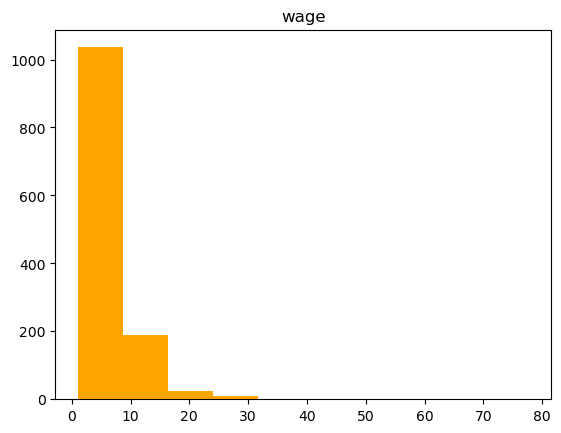


Для признака wage данные находятся в диапазоне от 1.02 до 77.72



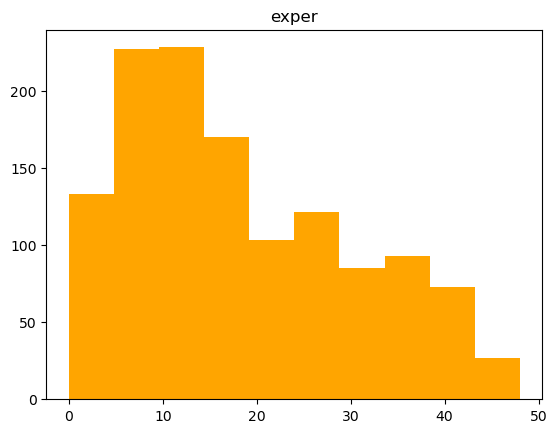


Для признака exper данные находятся в диапазоне от 0 до 48



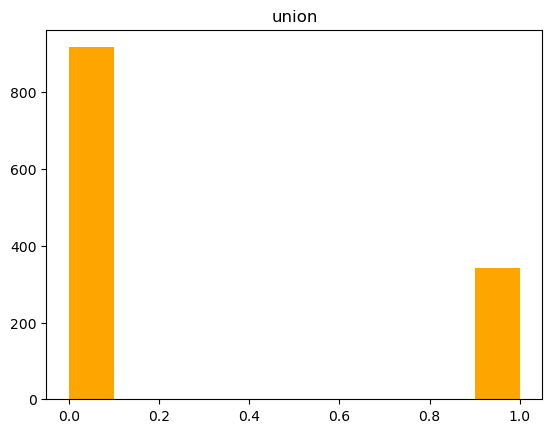


Для признака union данные находятся в диапазоне от 0 до 1



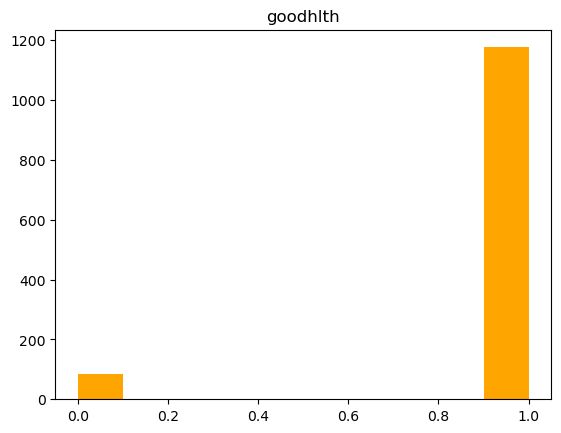


Для признака goodhlth данные находятся в диапазоне от 0 до 1



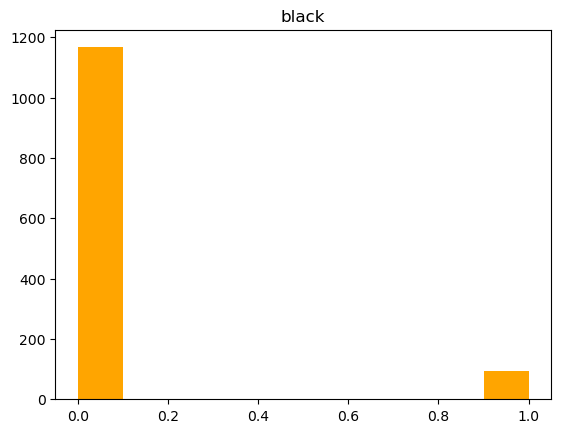


Для признака black данные находятся в диапазоне от 0 до 1



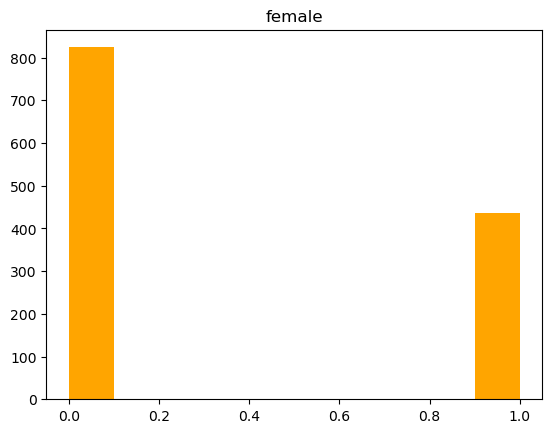


Для признака female данные находятся в диапазоне от 0 до 1



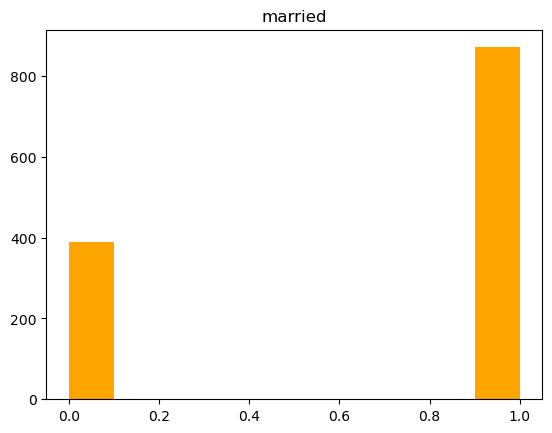


Для признака married данные находятся в диапазоне от 0 до 1



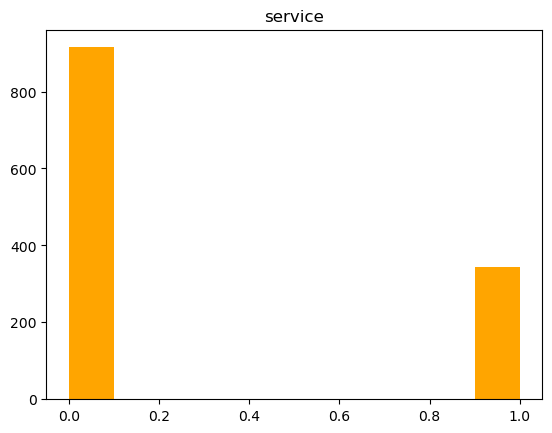


Для признака service данные находятся в диапазоне от 0 до 1



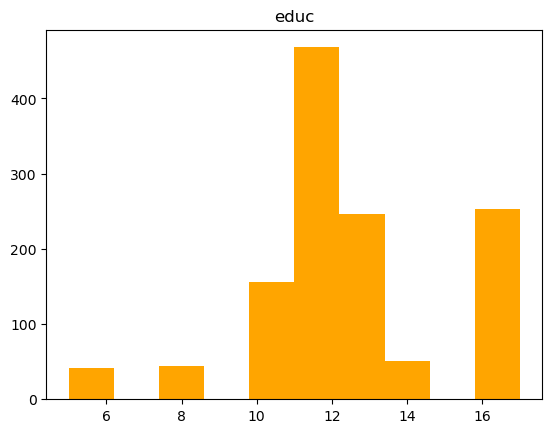


Для признака educ данные находятся в диапазоне от 5 до 17



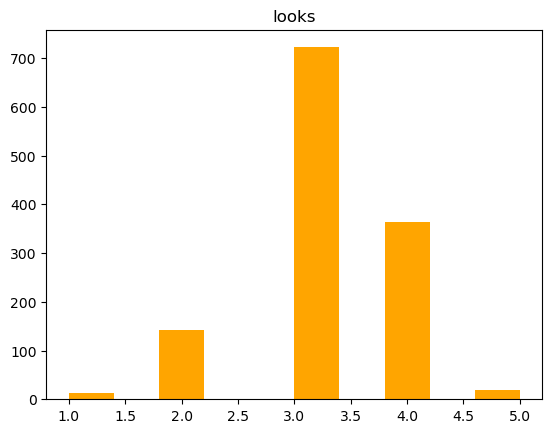


Для признака looks данные находятся в диапазоне от 1 до 5



In [ ]:
num = data.select_dtypes(include='number').columns.tolist()
for column in num:
    plt.hist(data[column], color = 'orange')
    plt.title(column)
    plt.show()
    print(f'\nДля признака {column} данные находятся в диапазоне от {data[column].min()} до {data[column].max()}\n')

Построение эмпирического распределения каждого существенного признака

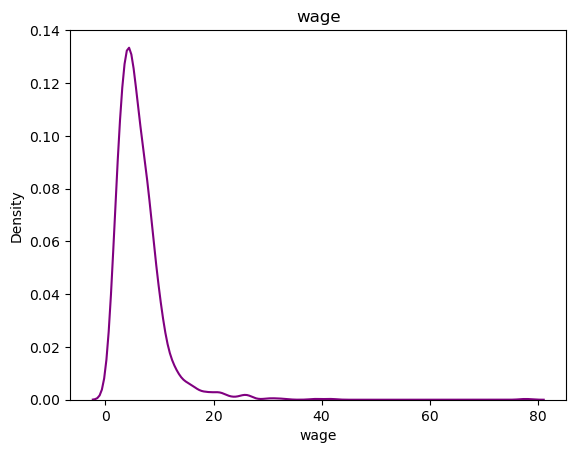

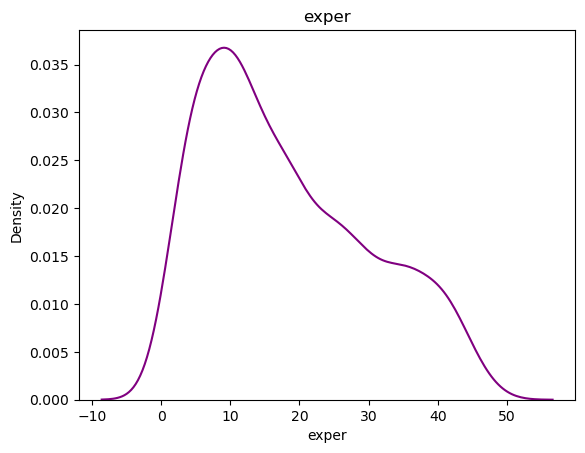

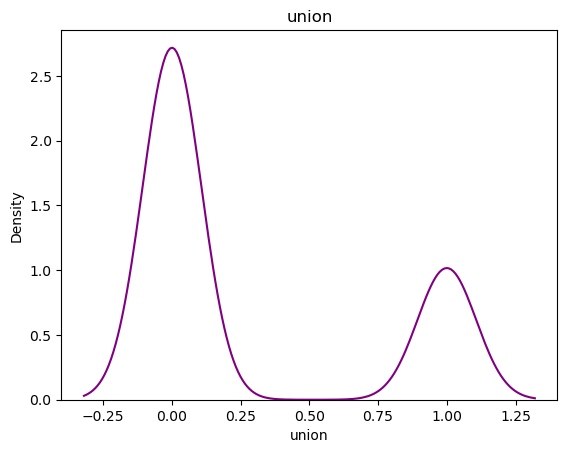

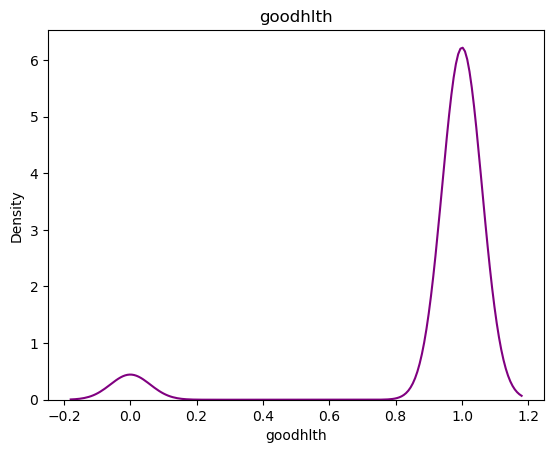

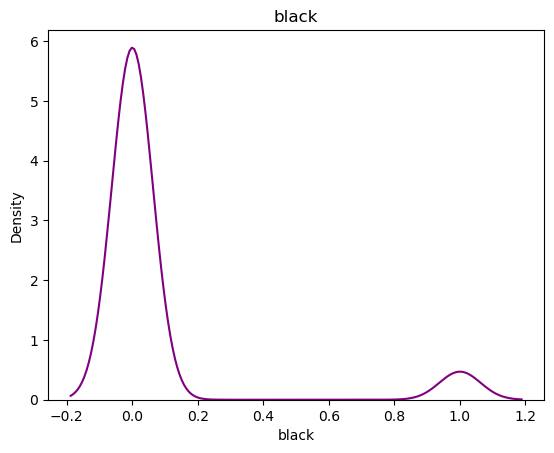

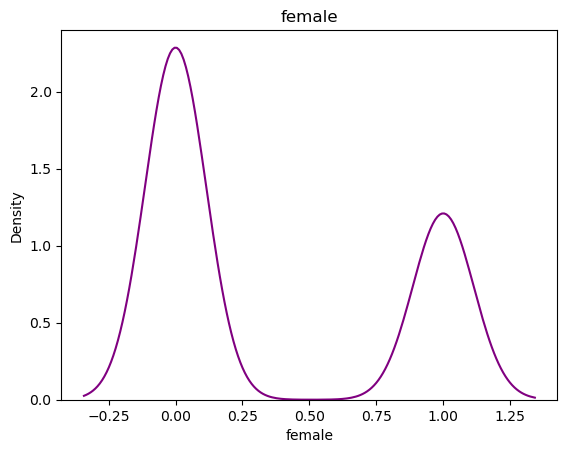

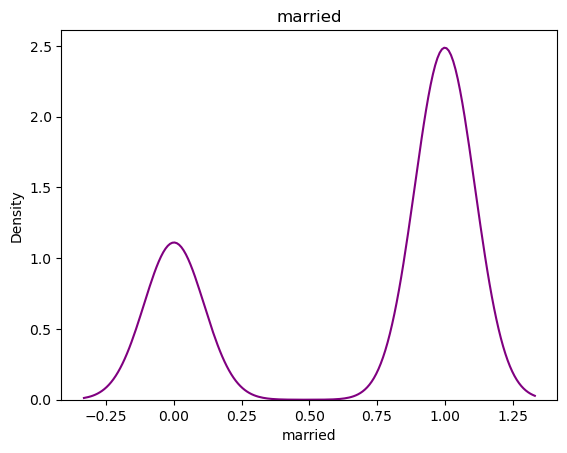

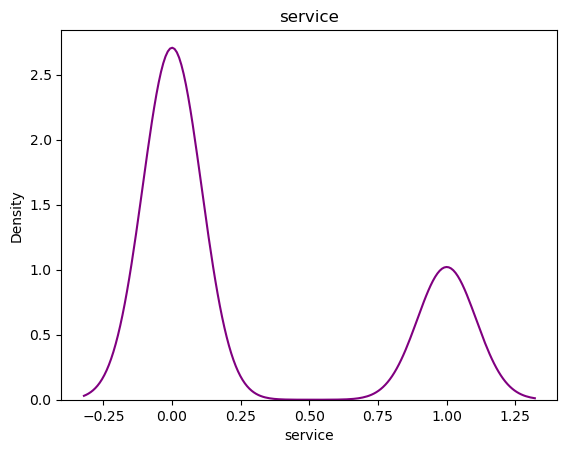

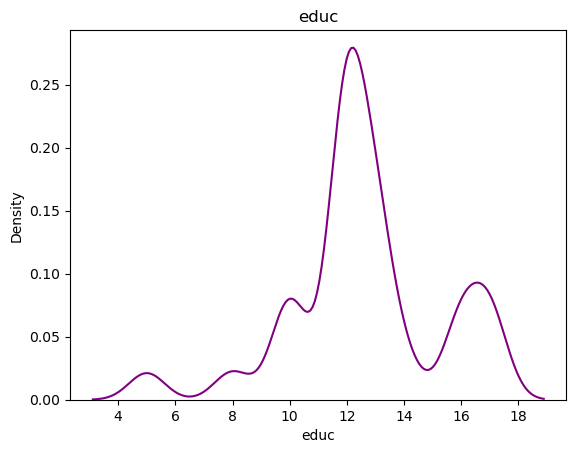

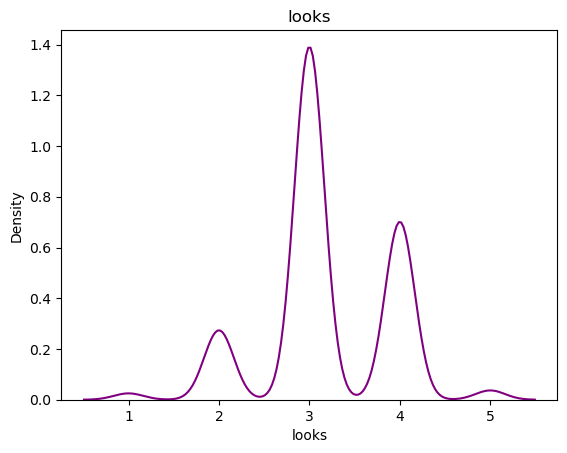

In [ ]:
for column in num:
    sns.kdeplot(data[column], color = 'purple')
    plt.title(column)
    plt.show()

Анализ количества и распределения отсутствующих значений

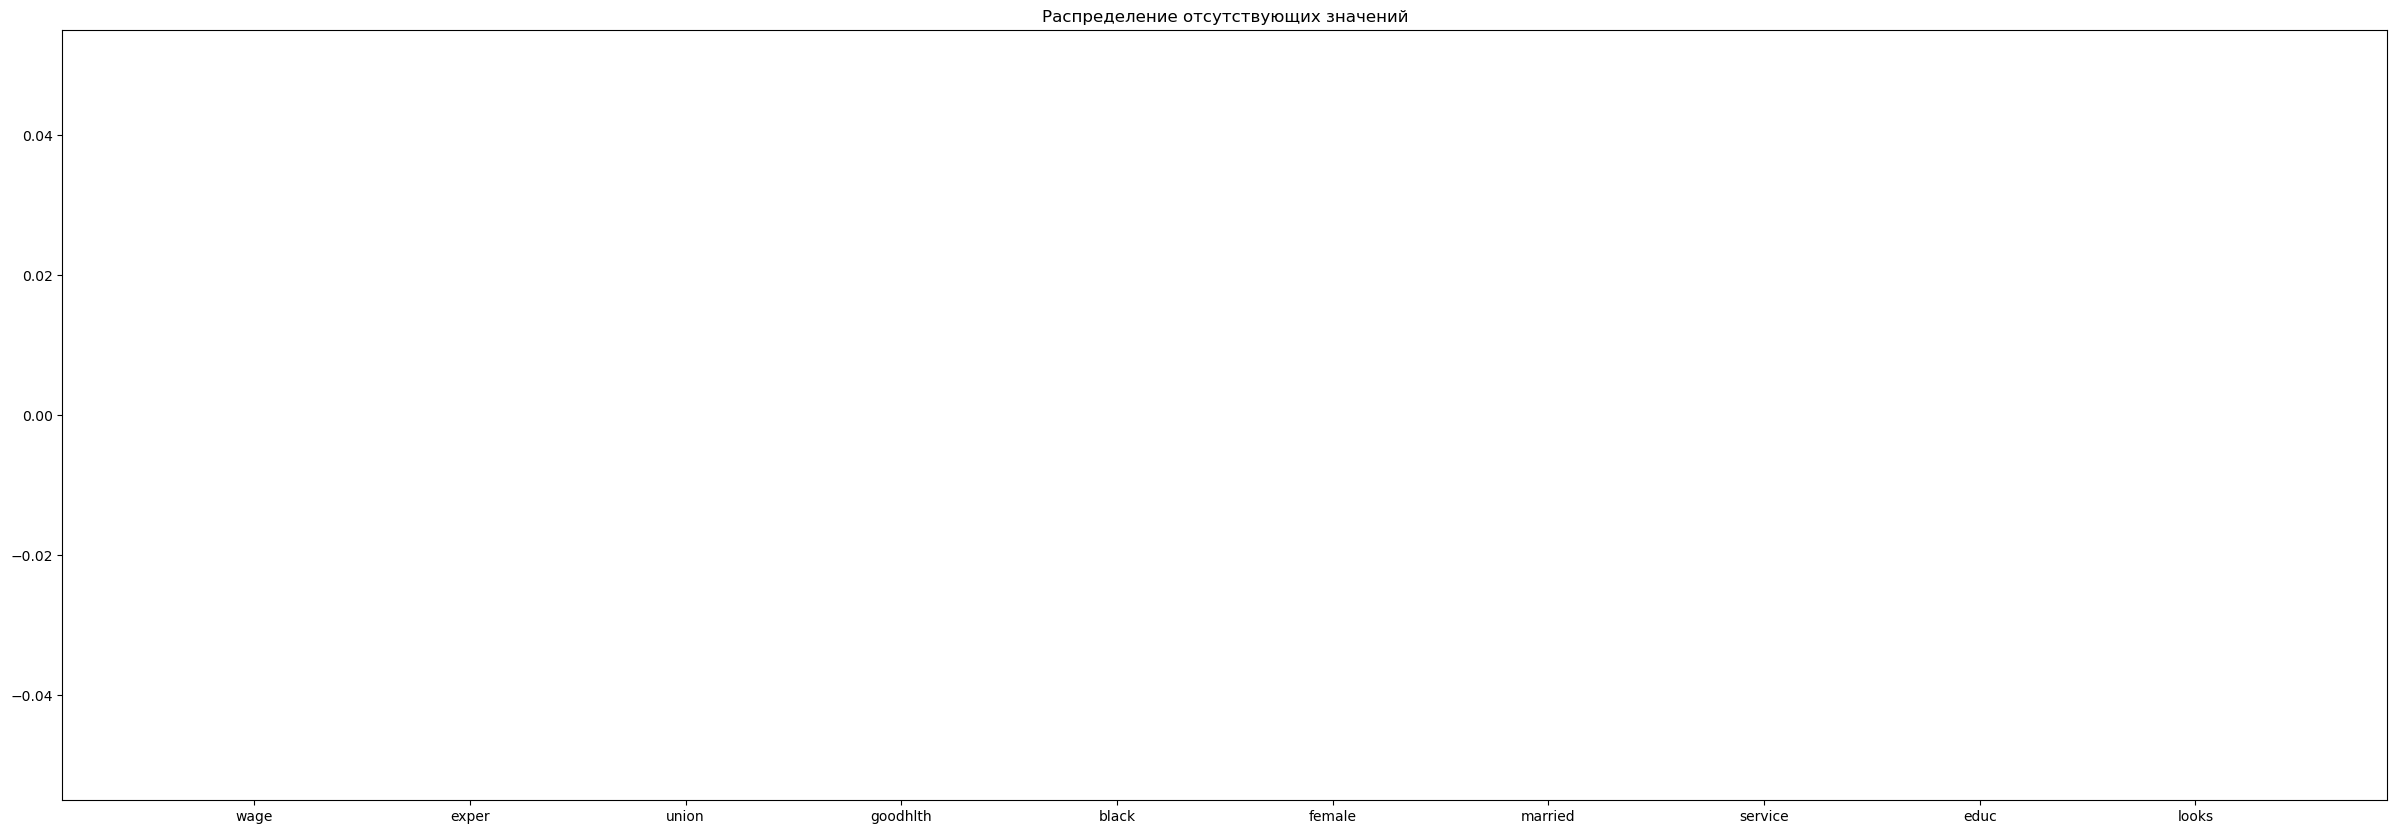

In [ ]:
a = (data[num].isna().sum()).to_list()
fig = plt.figure(figsize=(30, 10))
plt.title('Распределение отсутствующих значений')
plt.bar(num, a, color=['purple','green', 'orange']);
plt.show()

Построение совместного распределения каждого признака и целевой переменной

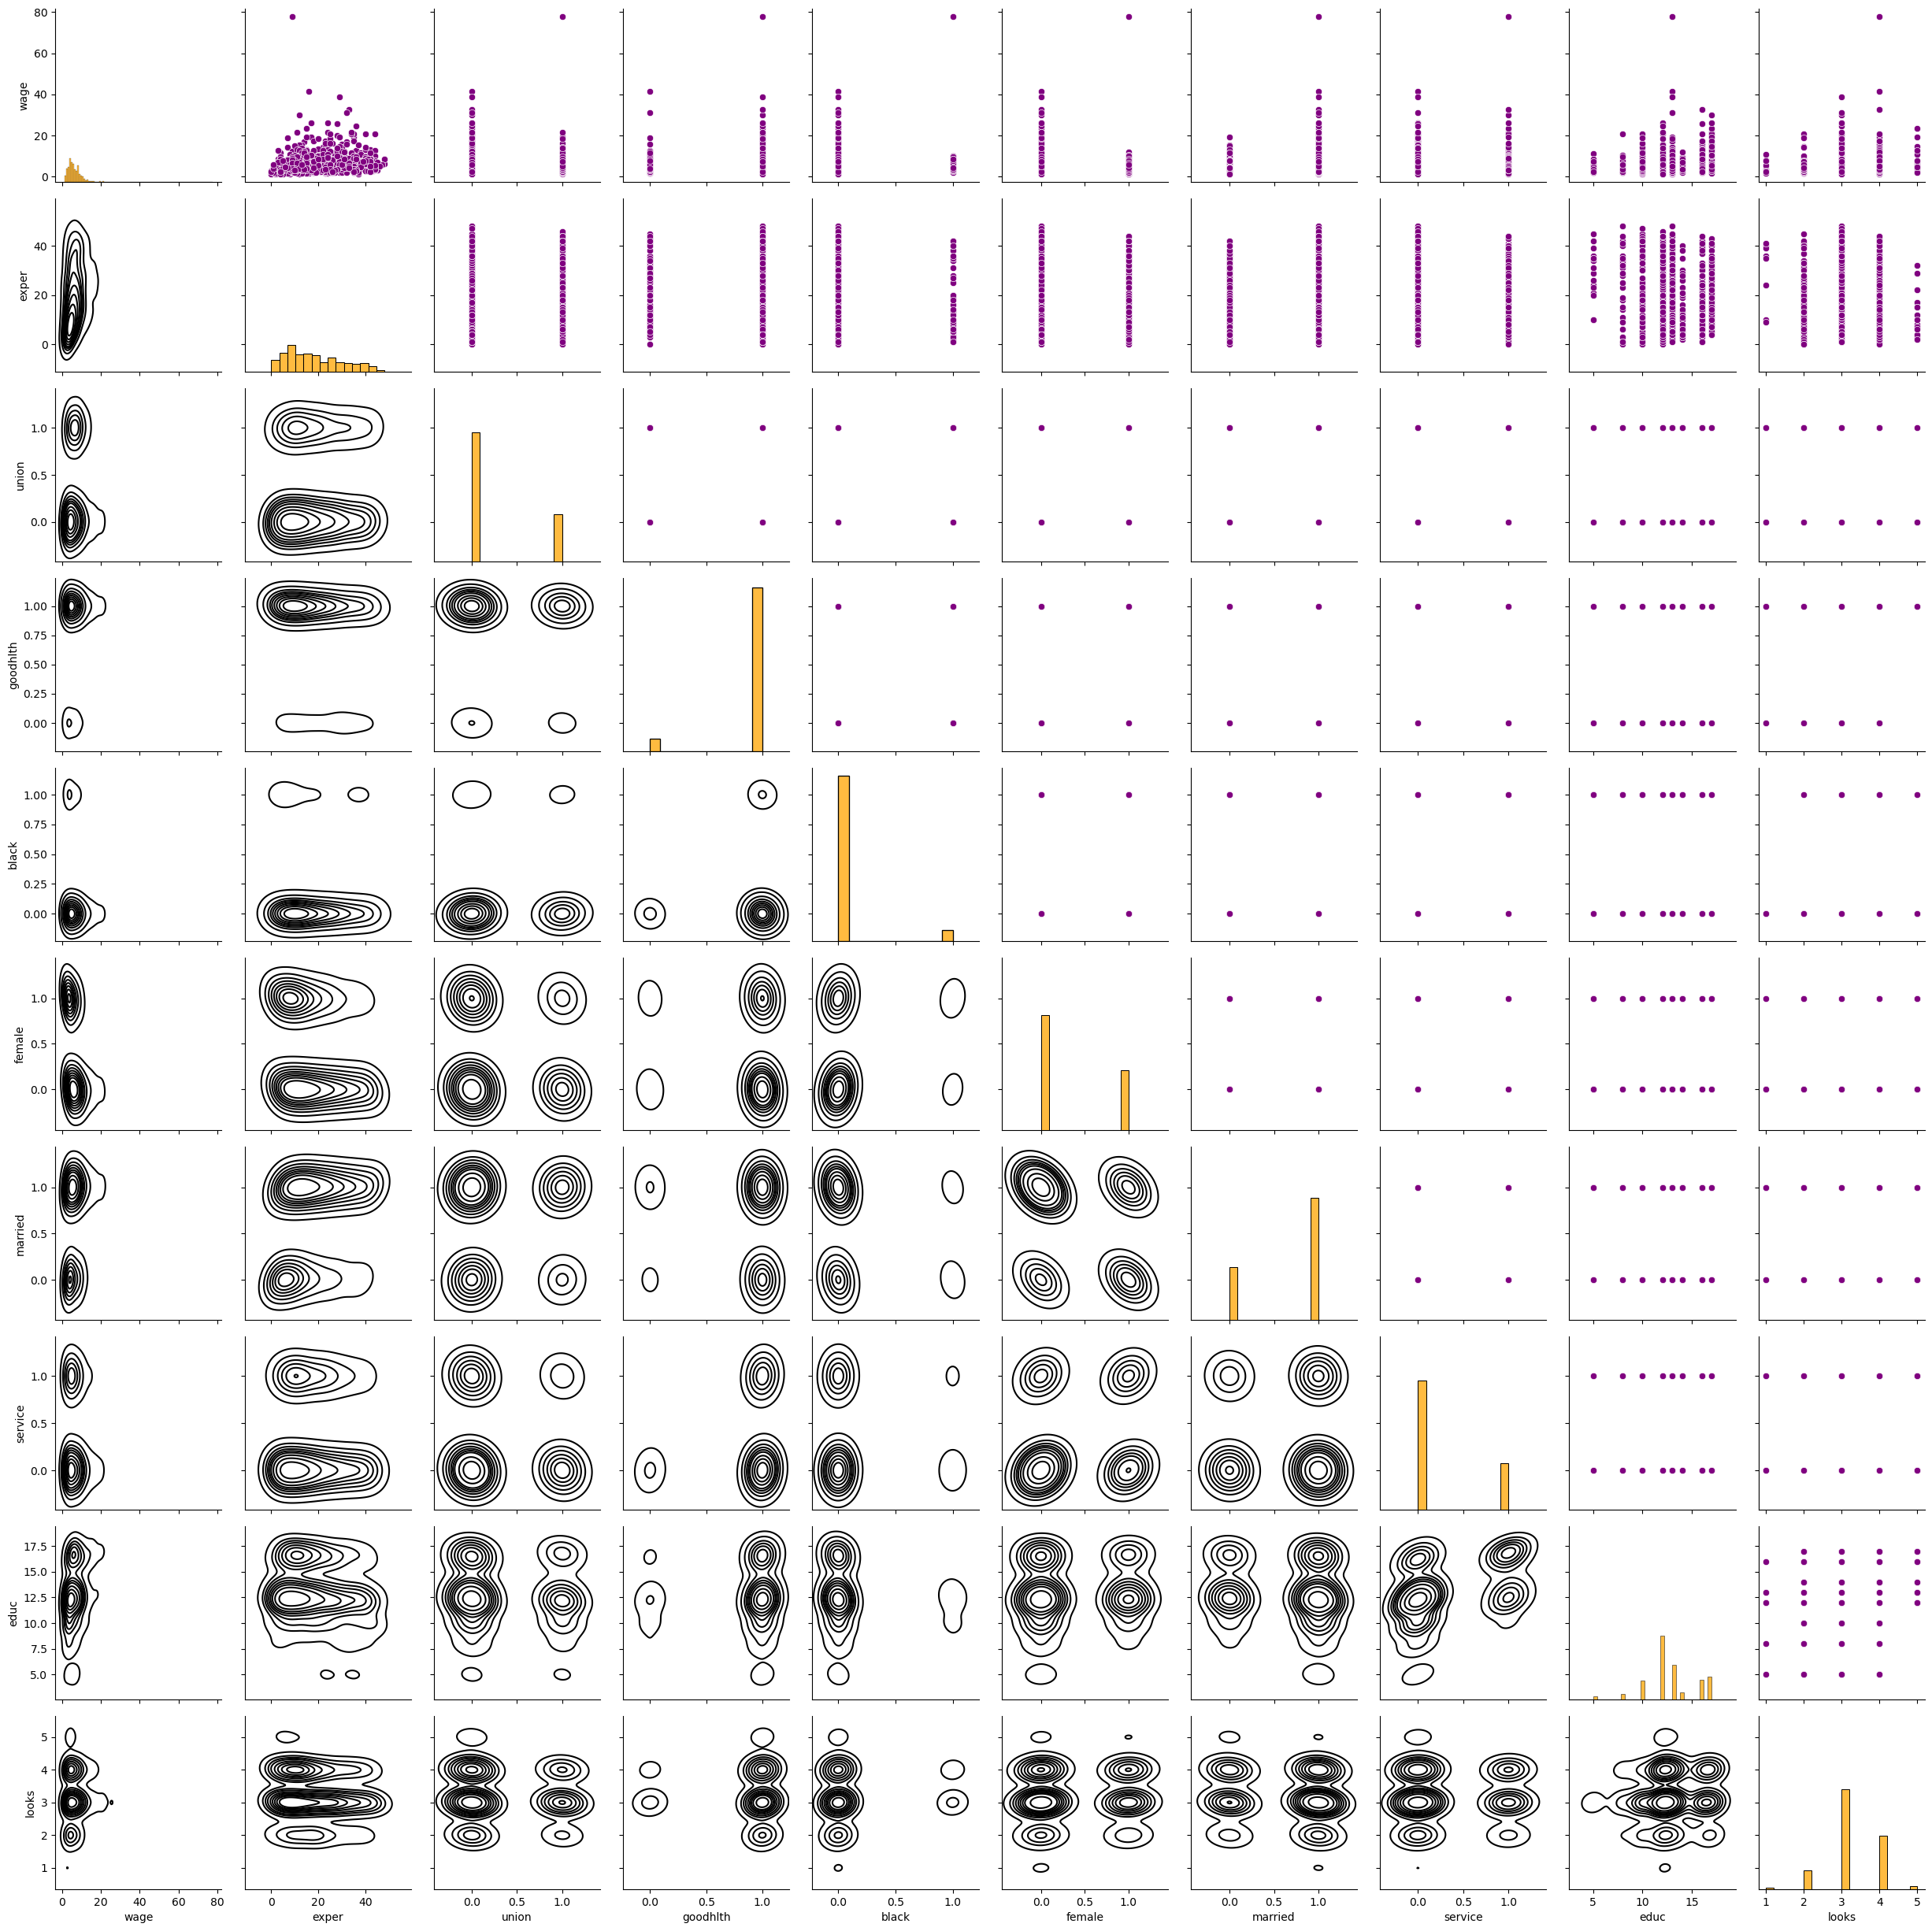

In [ ]:
data_gr = data[num]
g = sns.PairGrid(data_gr.iloc[:1000, :]) #если брать больше 9000 точек измерения, график не построится
g.map_lower(sns.kdeplot, color = 'black') 
g.map_upper(sns.scatterplot, color = 'purple')
g.map_diag(sns.histplot, color = 'orange') 

In [ ]:
data.corr()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


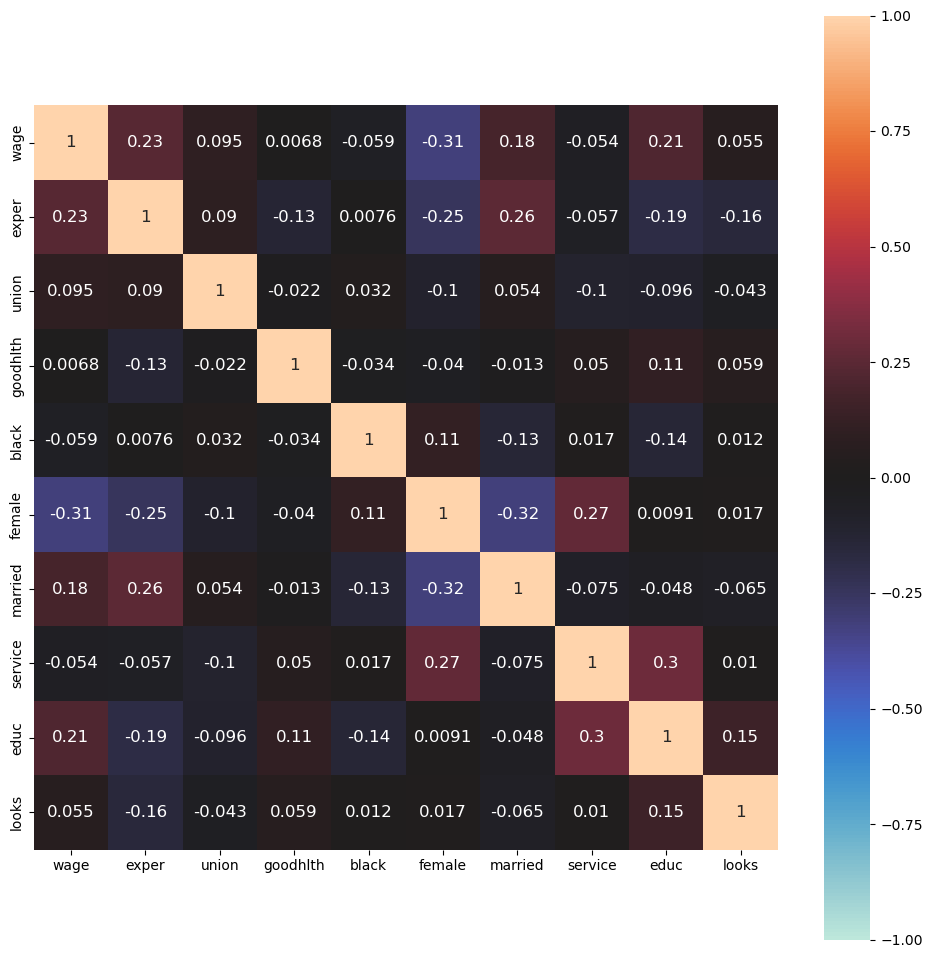

In [ ]:
plt.figure(figsize=(12,12))
cars_ax = sns.heatmap(data.corr(), annot=True, annot_kws={'size': 12}, vmin=-1, vmax=1, center=0, square=True)

In [ ]:
#удаление столбцов
#data = data.drop(columns =['a', 'b', 'c', 'd'], axis=1)

#копирование датасета
#data_copy = data.copy()

#категориальные признаки
#cat = data.select_dtypes(include='object').columns.tolist()

#кодирование категориальных признаков в числовые с помощью codes
'''
for i in cat:
  data[i] = data[i].astype('category')
  
for i in cat:
  data[i] = data[i].cat.codes
  print(data[i].head())
  
'''

#кодирование категориальных признаков в числовые с помощью labelencoder
'''
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() #перекодирую метки с помощью LabelEncoder

kat_list = data.select_dtypes(include='object').columns.tolist() #получаю список категориальных признаков

for i in data:
  if i in kat_list:
    data[i] = le.fit_transform(data[i])
'''

#кодирование категориальных признаков в числовые с помощью fit_transform 
#data['cat'] = le.fit_transform(data['cat']) 

#кодирование категориальных признаков в числовые c помощью dummy
'''
CAT = pd.get_dummies(data['cat'], prefix='CAT')
data = pd.concat([CAT, data], axis=1)
data = data.drop('CAT', axis=1)
'''

#кодирование категориальных признаков в числовые c помощью replace
#data['cat'].replace('hello', 0, inplace=True)


#замена значений
#data['a'] = data['a'].fillna(0) для числовых признаков
#data['cat'] = data['b'].fillna(data['a'].mode()[0]) для категориальных признаков

#замена значений через map
#data['cat'] = data['cat'].map({"little":1,"moderate":2,"rich":3 });

#шкалирование
'''
from sklearn.preprocessing import MinMaxScaler
data_scaler = data.copy()
data_scaler = data_scaler.drop(columns =['e'], axis=1) те, которые не надо шкалировать

scaler = MinMaxScaler()
data_scl = scaler.fit_transform(data_scaler)


data_scaler.insert(0, 'a_Шкалирование',data_scl[:, 0])
'''

#заменить все числовые значения на int
'''
num = data.select_dtypes(include='int').columns.tolist()
for i in num:
  data[i].astype('int')
'''

#очищение от выбросов
'''
for i in ['a']:
  Q1 = data['a'].quantile(q=.25)
  Q3 = data['a'].quantile(q=.75)
  IQR = Q3 - Q1

  f_c = Q1-(1.5*IQR)
  s_c = Q3 + (1.5*IQR)

  data.loc[data[i] < f_c,i] = np.nan заменить на что-то другое
  data.loc[data[i] > s_c,i] = np.nan заменить на что-то другое
'''

#сохранение в csv и чтение

'''
data.to_csv('data_new.csv')
data_new = pd.read_csv('data_new.csv')
'''

**Парная линейная регрессия**

Для визуального представления совместного распределения значений используемых переменных построим график зависимости одной переменной от другой.

```
    plt.figure()
    plt.scatter(x, y)
    plt.show()
```
Если прослеживается линейная зависимость, значит можем продолжать использовать парную линейную регрессию.

Класс для метода парной регрессии:
```
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    #простая функция ошибки - среднеквадратическое отклонение 
    (mean squared error, MSE)
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

     """метод градиентного спуска. должен принимать массив X и массив Y 
     и обновлять параметры регрессии в соответствии в формулами градиентного спуска"""   
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors
```

Создание объекта регрессии и проверка начального значения ошибки.

```
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)
```

Графическое представление. 

```
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()
```

График ошибки регрессии.

```
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()
```






**Парная линейная регрессия**

Импорт.
```
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
```

Решейп из DF в Series.

```
x = np.array(Y_mvid).reshape(-1, 1) 
y = np.array(Y_sber).reshape(-1, 1)
```

Создание модели и ее обучение.

```
reg = LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
```

Коэффициенты и метрики. 

```
print("Коэффициенты: ", 'b0 =', reg.coef_[0][0], ',', 'b1 =', reg.intercept_[0])
print("Среднеквадратичная ошибка: %.2f" % mean_squared_error(y, y_pred))
print("Коэффициент детерминации: %.2f" % r2_score(y, y_pred))
```

Визуализация.

```
plt.figure()
plt.scatter(x, y, alpha=0.2, color="red")
plt.plot(x, y_pred, color='black')
```




**Множественная линейная регрессия**

Модель линейной регрессии.
```
from sklearn.linear_model import LinearRegression
```

Разделение тестовой выборки 80-20. 

```
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

print(f'Количество точек исходных данных: {y.shape[0]}')
print(f'Количество точек тренировочных данных: {y_train.shape[0]}')
print(f'Количество точек тестовых данных: {y_test.shape[0]}')
```

Создание и обучение модели.
```
reg = linear_model.LinearRegression().fit(x_train, y_train)
```

Коэффициенты регрессии и свободный коэффициент.

```
reg.coef_
reg.intercept_
```

Метрика R^2 и средняя квадратичная ошибка.
```
reg.score(x_test, y_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
print("MSE: {}".format(mse)) # ошибка регрессии
```

Реальные значения выборки и предсказанные. 

```
# предсказания по валидационной выборке
y_pred_test = reg.predict(x_test)
df = copy(y_test)
df['y_pred'] = y_pred_test
```

Графическое представление модели.

```
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['y'], alpha=0.5, color='black', label='Реальные значения y от всех показателей x')
plt.scatter(df.index, df['y_pred'], alpha=0.5, color='red', label='Предсказанные значения y от всех показателей x')
plt.ylabel('Целевая переменная y')
plt.xlabel('Показатели x')
plt.legend()
plt.title('Модель множественной линейной регрессии')
plt.grid(alpha=0.2)
plt.show()
```




**Методы метрической классификации**

Выделяем целевую переменную и разделяем на тестовую и обучающуюся выборку.

```
Y = pima.label
X = pima.drop(['label'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)
```

Создаем модель, обучаем классификатор на обучающей выборке, делаем предсказание по классификатору на тестовой выборке.

```
cls = LogisticRegression()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
```

Оценим эффективность предсказания тестовой выборки с помощью матрицы классификации.

```
metrics.confusion_matrix(y_test, y_pred)
```

Наглядное отображение матрицы классификации с помощью тепловой карты.

```
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True, cbar=True)
plt.title('Тепловая карта')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

```
Метрика достоверности предсказания

```
metrics.accuracy_score(y_test, y_pred)
```

Метрика точности

```
metrics.precision_score(y_test, y_pred, pos_label='1') 

```

Метрика полноты

```
metrics.recall_score(y_test, y_pred, pos_label='1')
```









**Оценка эффективности модели бинарной классификации**

Случайное предсказание. 

```
RP_model = np.random.randint(low=0, high=2, size=len(y_test))
```

Логистическая регрессия
```
LR_model = LogisticRegression(solver="liblinear") #LIBLINEAR – A Library for Large Linear Classification
LR_model.fit(x_train, y_train)
```

Метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
```
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)
```

Метод k ближайших соседей (KNeighborsClassifier с двумя классами)

```
KN_model = KNeighborsClassifier(n_neighbors=2)
KN_model.fit(x_train, y_train)
```

Для логистической регрессии.

точность на тренировочной выборке

```
y_pred_train = LR_model.predict(x_train)
accuracy_score(y_train, y_pred_train)
```

точность на тестовой выборке

```
y_pred_test = LR_model.predict(x_test)
accuracy_score(y_test, y_pred_test)
```

Для всех. 

метрика F1

```
f1_RP = f1_score(y_test, RP_model)
```

ROC-кривые. 

```
probs_RP = ch[:, 1] #берем принадлежность к классу 1
fpr_RP, tpr_RP, treshold_RP = roc_curve(y_test, probs_RP)

y_pred_proba_LR = LR_model.predict_proba(x_test) #предсказанная вероятность принадлжености к определенному признаку (классу)
probs_LR = y_pred_proba_LR[:, 1] #берем принадлежность к классу 1
fpr_LR, tpr_LR, treshold_LR = roc_curve(y_test, probs_LR) #fpr – частота false positive результатов (true negative rate), tpr – частота true positive результатов (чувствительность)

y_pred_proba_LDA = LDA_model.predict_proba(x_test)
probs_LDA = y_pred_proba_LDA[:, 1]
fpr_LDA, tpr_LDA, treshold_LDA = roc_curve(y_test, probs_LDA)

y_pred_proba_KN = KN_model.predict_proba(x_test)
probs_KN = y_pred_proba_KN[:, 1]
fpr_KN, tpr_KN, treshold_KN = roc_curve(y_test, probs_KN)
```

Графическое представление. 


```
#кривая ROC — это отношение TPR к FPR

plt.figure(figsize=(10, 10))
plt.plot(fpr_RP, tpr_RP, color='green', label='ROC метода рандомных предсказаний')
plt.plot(fpr_LR, tpr_LR, color='red', label='ROC метода логистической регрессии')
plt.plot(fpr_LDA, tpr_LDA, color='black', label='ROC метода линейного дискриминантного анализа')
plt.plot(fpr_KN, tpr_KN, color='orange', label='ROC метода k ближайших соседей')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(bbox_to_anchor=(1,1), loc="best")
plt.show()

```

Площадь кривой ROC.

Площадь под кривой (AUC) является мерой способности классификатора различать классы


```
roc_auc_PR = auc(fpr_RP, tpr_RP)
roc_auc_LR = auc(fpr_LR, tpr_LR)
roc_auc_LDA = auc(fpr_LDA, tpr_LDA)
roc_auc_KN = auc(fpr_KN, tpr_KN)

print(f'Самая пригодная: модель метода линейного дискриминантного анализа со значением {roc_auc_LDA}\nМодель метода логистической регрессии со значением {roc_auc_LR}\nМодель метода k ближайших соседей со значением {roc_auc_KN}\nСамая непригодная: метод рандомных предсказаний {roc_auc_PR}')
```





**Кластеризация данных**

Графическое представление. 

```
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=malls, hue='Genre')
```

Определение наилучшего числа кластеров методом локтя. В датасете оставляем только необходимые столбцы.

```
interias = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=100)
	k_means.fit(mall1)
	interias.append(k_means.inertia_)

plt.title('Метод локтя')
plt.plot(range(1,11), interias)
plt.xticks(np.arange(1, 11, step=1))
```

Где график замедляет снижение и выходит на плато – локоть, берем это значение.

Обучение модели кластеров на основе полученного количества кластеров методом локтя. 

```
kmeans = KMeans(n_clusters = n, random_state = 0)
train_labels = kmeans.fit_predict(mall1)
train_labels
```

Графическая интерпретация с центрами кластеров. 

```
f, ax = plt.subplots()
centers = kmeans.cluster_centers_
sns.scatterplot(x=mall1['Annual Income (k$)'], y=mall1['Spending Score (1-100)'], hue=train_labels, palette="deep", data=mall1, ax=ax)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Train data')
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=50, alpha=0.7)
plt.show()
```

Метрики.
Калински-Харабас –– высокий показатель означает лучшую кластеризацию, так как наблюдения в каждом кластере ближе друг к другу (более плотные), в то время как сами кластеры находятся дальше друг от друга (хорошо разделены).
Силуэт –– значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.

```
calinski_harabasz_score(mall2, train_labels)
silhouette_score(mall2, train_labels)
```

Эффективность модели кластеризации в зависимости от количества кластеров.

Считаем метрики для каждого кол-ва кластеров.

```
results_calinski = []
results_silhouette = []

for i in range(2,15):

    kmeans_i = KMeans(n_clusters=i, random_state=0)
    predicted = kmeans_i.fit_predict(mall2)
    
    index_calinski = calinski_harabasz_score(mall2, predicted)
    results_calinski.append(index_calinski)

    index_silhouett = silhouette_score(mall2, predicted)
    results_silhouette.append(index_silhouett)
```

Шкалируем метрики.

```
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

results_silhouette = np.array(results_silhouette).reshape(-1, 1)
results_calinski = np.array(results_calinski).reshape(-1, 1)

cal_scaled = scaler.fit_transform(results_calinski)
sil_scaled = scaler.fit_transform(results_silhouette)
```

Графическое представление.

```
x = list(range(2,15))
y = sil_scaled
z = cal_scaled

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Silhouette score')
plt.plot(x, z, label='Calinski-Harabasz score')

plt.title('Результаты метрик')
plt.xlabel('Количество кластеров')
plt.xticks(x)
plt.legend()
plt.show()
```






**Понижение размерности данных.**

Разделяем данные. 

```
from sklearn.model_selection import train_test_split

y = target
X = credit_new
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
```

Шкалирование и модель случайных лесов. 

```
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred
```

Метрики.

```
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Recall = ', recall_score(y_test, y_pred))
print('Precision = ', precision_score(y_test, y_pred)) 
```

Метод главных компонент. 
```
from sklearn.decomposition import PCA
x_train_PCA = PCA(n_components=2).fit_transform(X_train,2);
x_test_PCA = PCA(n_components=2).fit_transform(X_test,2);

print(x_train_PCA.shape)
print(x_test_PCA.shape)
```

Переобучение модели рандомных лесов. 

```
classifier = RandomForestClassifier(random_state=0) 
classifier.fit(x_train_PCA, y_train) 
y_pred_PCA = classifier.predict(x_test_PCA) 
y_pred_PCA
```

Зависимость точности модели от размерности данных. 

```
accuracy = []
for i in range(1, X.shape[1]+1): 
    x_train_PCA = PCA(n_components=i).fit_transform(X_train,2); 
    x_test_PCA = PCA(n_components=i).fit_transform(X_test,2); 
    classifier = RandomForestClassifier(random_state=0) 
    classifier.fit(x_train_PCA, y_train) 
    y_pred_PCA = classifier.predict(x_test_PCA) 
    temp_accuracy = accuracy_score(y_test, y_pred_PCA) 
    accuracy.append(temp_accuracy) 
```

Графическое представление.
```
fig = plt.figure(figsize=(15,10))
plt.plot(range(1, X.shape[1]+1), accuracy)
plt.title('График зависимости точности модели от размерности данных', fontsize=16)
plt.xlabel('Размерность данных', fontsize=14)
plt.ylabel('Точность', fontsize=14)
plt.xticks(range(1, X.shape[1]+1))
plt.legend()
```



